In [37]:
!pip install qiskit
%matplotlib inline
!pip install qiskit-aer


In [50]:
from qiskit.visualization import plot_bloch_multivector, plot_histogram
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit, execute, Aer
from qiskit.quantum_info import Statevector, Operator, Pauli, Statevector

In [56]:
def normalize_vector(v):
    return v / np.linalg.norm(v)

In [57]:
def initialize_quantum_state(beta):
    qc = QuantumCircuit(1, 1)
    qc.initialize(beta, 0)
    return qc

In [58]:
def calculate_n_plus(theta, phi):
    coefficient_1 = np.cos(theta/2)
    coefficient_2 = np.exp(1j * phi) * np.sin(theta/2)
    n_plus = np.array([coefficient_1, coefficient_2])
    return n_plus

In [59]:
def calculate_n_minus(theta, phi):
    coefficient_1 = -np.exp(-1j * phi) * np.sin(theta/2)
    coefficient_2 = np.cos(theta/2)
    n_minus = np.array([coefficient_1, coefficient_2])
    return n_minus

n_plus: [0.54394472+0.j         0.37526634+0.75053269j]
n_minus: [-0.37526634+0.75053269j  0.54394472+0.j        ]


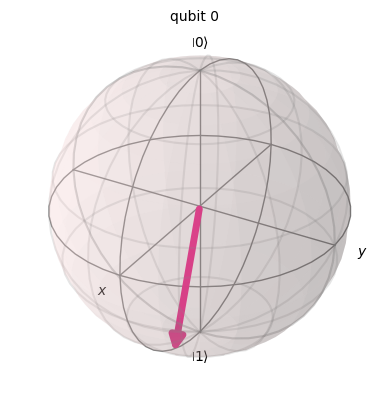

In [60]:
def rotate_to_measurement_basis(qc, n):
    theta = np.arccos(n[2])
    phi = np.arcsin(n[1] / np.sin(theta))
    qc.u(-theta, phi, -phi, 0)

    # Calculate n_plus
    n_plus = calculate_n_plus(theta, phi)
    n_minus = calculate_n_minus(theta, phi)
    # Print the result
    print("n_plus:", n_plus)
    print("n_minus:", n_minus)

# Example usage
v_example = np.array([1, 2, -1]) / np.sqrt(6)
beta_example = np.array([1, -1j]) / np.sqrt(2)

# Normalize vectors
n = normalize_vector(v_example)
psi = normalize_vector(beta_example)

qc = initialize_quantum_state(psi)
rotate_to_measurement_basis(qc, n)

# You can also visualize the Bloch vector
backend = Aer.get_backend('statevector_simulator')
statevector = execute(qc, backend).result().get_statevector()
plot_bloch_multivector(statevector)

In [61]:
def measure_quantum_state(qc):
    qc.measure(0, 0)
    return qc

In [62]:
def execute_quantum_circuit(qc, shots=2**14):
    simulator = Aer.get_backend('qasm_simulator')
    counts = execute(qc, simulator, shots=shots).result().get_counts()
    return counts

In [63]:
def normalize_counts(counts, shots):
    counts['0'] = counts['0'] / shots
    counts['1'] = counts['1'] / shots
    return counts

In [66]:
def display_histogram(counts):
    display(plot_histogram(counts))

n_plus: [0.54394472+0.j         0.37526634+0.75053269j]
n_minus: [-0.37526634+0.75053269j  0.54394472+0.j        ]


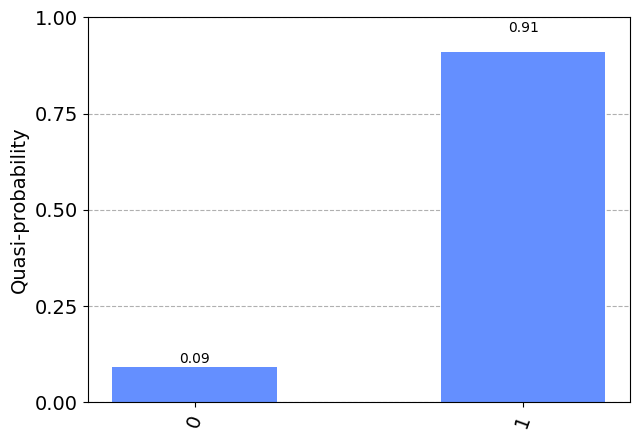

p(+1): 0.9082482904638631
p(-1): 0.09175170953613693


In [67]:
def measurement_probabilities(v, beta):
    n = normalize_vector(v)
    psi = normalize_vector(beta)

    qc = initialize_quantum_state(psi)
    rotate_to_measurement_basis(qc, n)
    qc = measure_quantum_state(qc)

    counts = execute_quantum_circuit(qc)
    normalized_counts = normalize_counts(counts, shots=2**14)

    display_histogram(normalized_counts)

    # Calculate probabilities
    n_plus = calculate_n_plus(np.arccos(n[2]), np.arcsin(n[1] / np.sin(np.arccos(n[2]))))
    n_minus = calculate_n_minus(np.arccos(n[2]), np.arcsin(n[1] / np.sin(np.arccos(n[2]))))

    p_plus = np.abs(np.dot(n_plus, psi))**2
    p_minus = np.abs(np.dot(n_minus, psi))**2

    print("p(+1):", p_plus)
    print("p(0):", p_minus)

# Example usage
v_example = np.array([1, 2, -1]) / np.sqrt(6)
beta_example = np.array([1, -1j]) / np.sqrt(2)

measurement_probabilities(v_example, beta_example)